### Import and Data load

In [1]:
import hdf5storage
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
import keras.models
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
savepath = 'C:\\Users\\nelab_under2\\capstone\\data'
loadpath = 'C:\\Users\\nelab_under2\\capstone\\data'

In [3]:
for fold_no in [1,2,3,4,5]:
    
    train_test = np.random.permutation(21)
    train_use = train_test[0:18]
    test_use = train_test[19:]
    
    X_train = []
    y_train = []
    for loading in train_use:
        mat = hdf5storage.loadmat(loadpath+'\\'+str(loading+1)+'_psd_input.mat');
        X_original = mat['psd']
        y_original = mat['label']
        y_original = np.transpose(y_original)
        
        if len(X_train):
            X_train = np.concatenate([X_train, X_original], axis=0)
        else:
            X_train = X_original
        del X_original
        
        if len(y_train):
            y_train = np.concatenate([y_train, y_original], axis=0)
        else:
            y_train = y_original
        del y_original
        
    X_train = np.reshape(X_train, [np.shape(X_train)[0], np.shape(X_train)[1], np.shape(X_train)[2], 1])
    
    X_test = []
    y_test = []
    for loading in test_use:
        mat = hdf5storage.loadmat(loadpath+'\\'+str(loading+1)+'_psd_input.mat');
        X_original = mat['psd']
        y_original = mat['label']
        y_original = np.transpose(y_original)      
        
        if len(X_test):
            X_test = np.concatenate([X_test, X_original], axis=0)
        else:
            X_test = X_original
        del X_original
        
        if len(y_test):
            y_test = np.concatenate([y_test, y_original], axis=0)
        else:
                y_test = y_original
        del y_original
        
    X_test = np.reshape(X_test, [np.shape(X_test)[0], np.shape(X_test)[1], np.shape(X_test)[2], 1])

In [4]:
X_train.shape

(48078, 64, 5, 1)

In [5]:
y_train.shape

(48078, 1)

In [6]:
X_test.shape

(5342, 64, 5, 1)

In [7]:
y_test.shape

(5342, 1)

### CNN

In [8]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(64,5,1)))   
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(64,5,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
epochs = 100
batch_size = 128
validation_split = 0.2

# Early Stopping
es = EarlyStopping(monitor="loss",
                   patience=10,
                   verbose=1,
                   mode="max",
                   restore_best_weights=True,)


# Reduce Learning Rate
reduce_lr = ReduceLROnPlateau(monitor="loss",
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              mode="max",
                              min_lr=0.00001)

### Model training

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 3, 64)         640       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 1, 64)         36928     
                                                                 
 batch_normalization (BatchN  (None, 60, 1, 64)        256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense (Dense)               (None, 512)               1966592   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

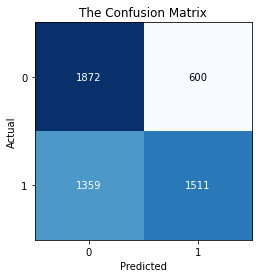

Accuracy: 63.32834144515162 %
Epoch 1/100
301/301 [==============================] - 8s 26ms/step - loss: 3.6978e-04 - accuracy: 0.9999 - val_loss: 5.3594 - val_accuracy: 0.5684 - lr: 1.0000e-05
Epoch 2/100
301/301 [==============================] - 8s 25ms/step - loss: 3.4007e-04 - accuracy: 0.9999 - val_loss: 5.3805 - val_accuracy: 0.5681 - lr: 1.0000e-05
Epoch 3/100
301/301 [==============================] - 8s 25ms/step - loss: 2.8607e-04 - accuracy: 0.9999 - val_loss: 5.4077 - val_accuracy: 0.5693 - lr: 1.0000e-05
Epoch 4/100
301/301 [==============================] - 8s 25ms/step - loss: 3.2946e-04 - accuracy: 0.9999 - val_loss: 5.4378 - val_accuracy: 0.5689 - lr: 1.0000e-05
Epoch 5/100
301/301 [==============================] - 8s 25ms/step - loss: 2.7506e-04 - accuracy: 1.0000 - val_loss: 5.4635 - val_accuracy: 0.5700 - lr: 1.0000e-05
Epoch 6/100
301/301 [==============================] - 8s 25ms/step - loss: 3.8261e-04 - accuracy: 0.9999 - val_loss: 5.4904 - val_accuracy: 0.56

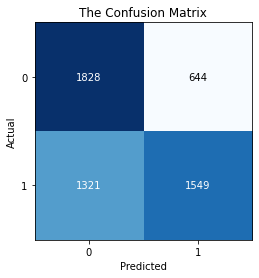

Accuracy: 63.21602396106327 %
Epoch 1/100
301/301 [==============================] - 8s 26ms/step - loss: 2.4211e-04 - accuracy: 0.9999 - val_loss: 5.8383 - val_accuracy: 0.5672 - lr: 1.0000e-05
Epoch 2/100
301/301 [==============================] - 8s 26ms/step - loss: 2.7023e-04 - accuracy: 0.9999 - val_loss: 5.8510 - val_accuracy: 0.5677 - lr: 1.0000e-05
Epoch 3/100
301/301 [==============================] - 8s 26ms/step - loss: 2.5401e-04 - accuracy: 0.9999 - val_loss: 5.8336 - val_accuracy: 0.5670 - lr: 1.0000e-05
Epoch 4/100
301/301 [==============================] - 8s 26ms/step - loss: 2.4880e-04 - accuracy: 0.9999 - val_loss: 5.8556 - val_accuracy: 0.5671 - lr: 1.0000e-05
Epoch 5/100
301/301 [==============================] - 8s 25ms/step - loss: 2.4833e-04 - accuracy: 0.9999 - val_loss: 5.9065 - val_accuracy: 0.5662 - lr: 1.0000e-05
Epoch 6/100
301/301 [==============================] - 8s 25ms/step - loss: 2.0248e-04 - accuracy: 0.9999 - val_loss: 5.8994 - val_accuracy: 0.56

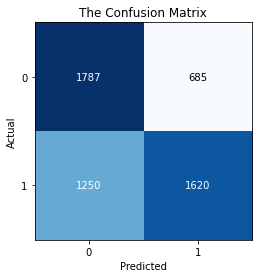

Accuracy: 63.777611381505054 %
Epoch 1/100
301/301 [==============================] - 8s 26ms/step - loss: 1.7413e-04 - accuracy: 1.0000 - val_loss: 6.5426 - val_accuracy: 0.5648 - lr: 1.0000e-05
Epoch 2/100
301/301 [==============================] - 8s 26ms/step - loss: 1.2254e-04 - accuracy: 0.9999 - val_loss: 6.5963 - val_accuracy: 0.5653 - lr: 1.0000e-05
Epoch 3/100
301/301 [==============================] - 8s 26ms/step - loss: 1.5107e-04 - accuracy: 1.0000 - val_loss: 6.5817 - val_accuracy: 0.5669 - lr: 1.0000e-05
Epoch 4/100
301/301 [==============================] - 8s 25ms/step - loss: 1.5956e-04 - accuracy: 0.9999 - val_loss: 6.6275 - val_accuracy: 0.5667 - lr: 1.0000e-05
Epoch 5/100
301/301 [==============================] - 8s 25ms/step - loss: 1.4131e-04 - accuracy: 1.0000 - val_loss: 6.6211 - val_accuracy: 0.5654 - lr: 1.0000e-05
Epoch 6/100
301/301 [==============================] - 8s 26ms/step - loss: 1.7140e-04 - accuracy: 0.9999 - val_loss: 6.6917 - val_accuracy: 0.5

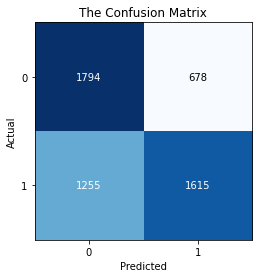

Accuracy: 63.81505054286784 %
Epoch 1/100
301/301 [==============================] - 8s 26ms/step - loss: 2.1574e-04 - accuracy: 0.9999 - val_loss: 6.7170 - val_accuracy: 0.5671 - lr: 1.0000e-05
Epoch 2/100
301/301 [==============================] - 8s 26ms/step - loss: 1.9550e-04 - accuracy: 0.9999 - val_loss: 6.7588 - val_accuracy: 0.5648 - lr: 1.0000e-05
Epoch 3/100
301/301 [==============================] - 8s 26ms/step - loss: 1.4355e-04 - accuracy: 0.9999 - val_loss: 6.7145 - val_accuracy: 0.5650 - lr: 1.0000e-05
Epoch 4/100
301/301 [==============================] - 8s 26ms/step - loss: 1.1281e-04 - accuracy: 1.0000 - val_loss: 6.7628 - val_accuracy: 0.5639 - lr: 1.0000e-05
Epoch 5/100
301/301 [==============================] - 8s 26ms/step - loss: 1.3672e-04 - accuracy: 0.9999 - val_loss: 6.7894 - val_accuracy: 0.5644 - lr: 1.0000e-05
Epoch 6/100
301/301 [==============================] - 8s 26ms/step - loss: 1.5047e-04 - accuracy: 0.9999 - val_loss: 6.8108 - val_accuracy: 0.56

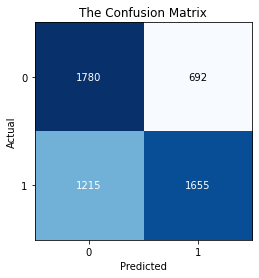

Accuracy: 64.30175964058405 %


In [10]:
num_folds = 5

acc_per_fold = []
loss_per_fold = []

skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

fold_no = 1

for train, test in skf.split(X_train, y_train):

    Nshape = np.shape(X_train)
    input_shape = (Nshape[1],Nshape[2],Nshape[3]) #64,5,1

       
    if fold_no == 1:
        model.summary()
        
        
    epochs = 100
    batch_size = 128
    validation_split = 0.2


    # Early Stopping
    es = EarlyStopping(monitor="loss",
                   patience=10,
                   verbose=1,
                   mode="min",
                   restore_best_weights=True,)

    
    # Reduce Learning Rate
    reduce_lr = ReduceLROnPlateau(monitor="loss",
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              mode="min",
                              min_lr=0.00001)
    
        
    classifier = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_split=validation_split,
                    callbacks=[es, reduce_lr])
    
    len(classifier.history['loss'])
    scores = model.evaluate(X_test, y_test, verbose=0)
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
        
    test_output = model.predict(X_test)
    y_pred = np.where(test_output > 0.5, 1, 0)
    test_answer = y_test
    print('Accuracy:{:0.4f}'.format(accuracy_score(y_test, y_pred)))
    cm = confusion_matrix(y_test, y_pred)

    def confusion_matrix_1(CM):
        fig, ax = plot_confusion_matrix(conf_mat=CM)
        plt.title("The Confusion Matrix")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.show()

        print("Accuracy: " + str((CM[1,1]+CM[0,0])/(CM[0,0]+CM[0,1]+CM[1,0]+CM[1,1])*100) + " %")
    confusion_matrix_1(cm)

    model.save('C:\\Users\\nelab_under2\\capstone\\best_model'+str(fold_no)+'final_model.h5')
    
    fold_no = fold_no + 1

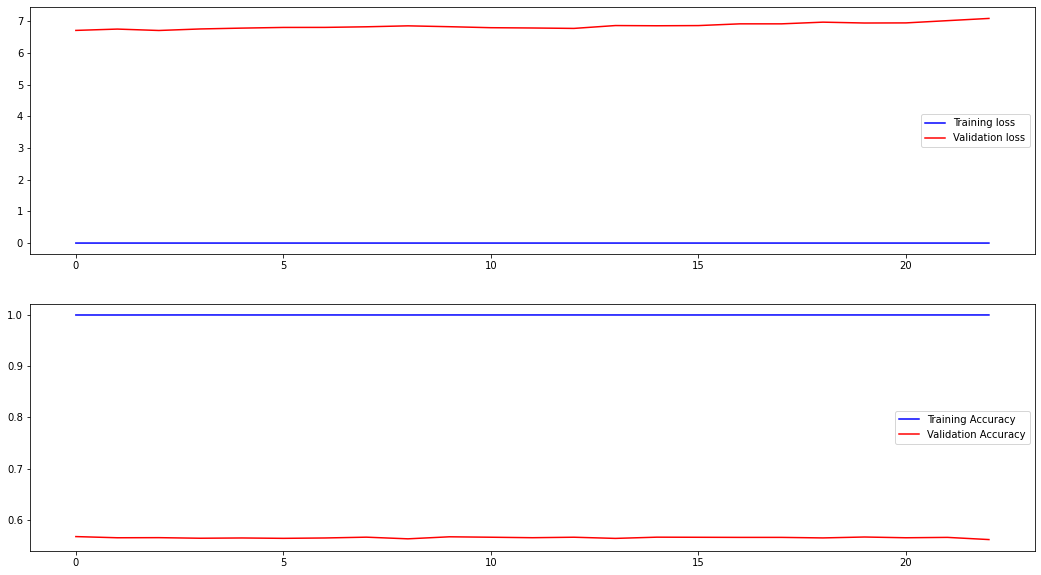

In [11]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(classifier.history['loss'], color='b', label="Training loss")
ax[0].plot(classifier.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best')

ax[1].plot(classifier.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(classifier.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best')